Plot diurnal cycle at grid points
===

Import custom modules for working with model and AWS data
----

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

from model import Model
from GCNet import GCNet

Load AWS metadata
----

In [2]:
A = GCNet("site_info.nc")
A.loadMeta()
nSites = A.getNSites()

Load AWS diurnal cycle data
---

In [3]:
awsDir = "/Users/dbr/Documents/GCNet/current/AirT1"
awsFN = "AirT1_diurnal.nc"
B = Model(None, awsDir+"/"+awsFN)

awsMonth = np.array( B.loadData( "month" ) )
awsHour = np.array( B.loadData( "hour" ) )
awsTas = np.array( B.loadData( "AirT1" ) )
print awsTas.shape

(12, 24, 23)


/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater


Model metadata
---

In [6]:
yr1 = "2071"
yr2 = "2080"
yrs = yr1+"-"+yr2

mon = 6
mons = "%02d" % mon

ens = 11
enss = "%03d" % ens

mdlFN = "wrf_cesmlw_tas_"+enss+"_"+yrs+"_"+mons+"_diurnal_closest.nc"

Read model diurnal cycle data
---

In [7]:
D = Model(None, mdlFN)

mdlMonth = np.array( D.loadData( "month" ) )
mdlHour = np.array( D.loadData( "hour" ) )
mdlTas = np.array( D.loadData( "tas" ) )
print mdlTas.shape

(1, 8, 23)


Set default AWS and month indices
---

In [14]:
month = 6
awsIX = 6

Plot model data
---

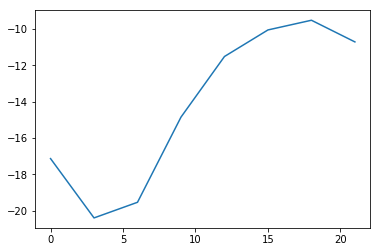

In [15]:
fig, ax = plt.subplots()
x = mdlHour
y = mdlTas[month-int(mdlMonth[0]),:,awsIX-1]
ax.plot(x, y );

Plot AWS data
---

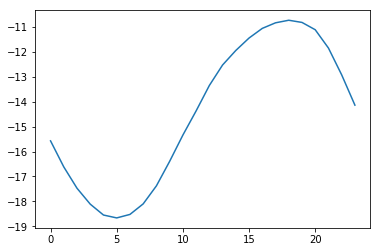

In [16]:
fig, ax = plt.subplots()
x = awsHour
y = awsTas[month-1,:,awsIX-1]
ax.plot(x, y );

Plot AWS & model data: same y axis
---

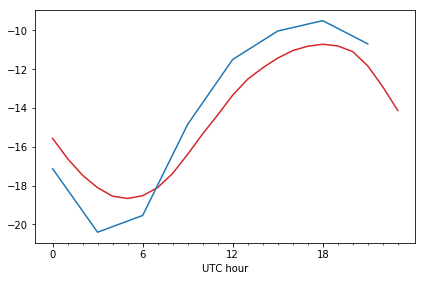

In [17]:
fig, ax1 = plt.subplots()
color = 'tab:red'
x = awsHour
y = awsTas[month-1,:,awsIX-1]
# ax1.set_ylabel('AWS', color=color)
ax1.plot(x, y, color=color );
# ax1.tick_params(axis='y', labelcolor=color)
plt.xlabel('UTC hour')

majors = [0, 6, 12, 18]
ax1.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 23, 24)[1:]
ax1.xaxis.set_minor_locator(ticker.FixedLocator(minors))

# ax2 = ax1.twinx()
color = 'tab:blue'
x = mdlHour
y = mdlTas[month-int(mdlMonth[0]),:,awsIX-1]

ax1.plot(x, y, color=color );
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylabel('ERAI', color=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Plot AWS & model data: separate y axes
---

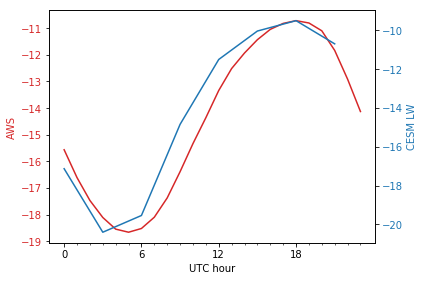

In [18]:
fig, ax1 = plt.subplots()
color = 'tab:red'
x = awsHour
y = awsTas[month-1,:,awsIX-1]
ax1.set_ylabel('AWS', color=color)
ax1.plot(x, y, color=color );
ax1.tick_params(axis='y', labelcolor=color)
plt.xlabel('UTC hour')

majors = [0, 6, 12, 18]
ax1.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 23, 24)[1:]
ax1.xaxis.set_minor_locator(ticker.FixedLocator(minors))

ax2 = ax1.twinx()
color = 'tab:blue'
x = mdlHour
y = mdlTas[month-int(mdlMonth[0]),:,awsIX-1]

ax2.plot(x, y, color=color );
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('CESM LW', color=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()